In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## **Image Dataset**

In [ ]:
# for images
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
#from skimage.color import rgb2gray

# for wiener filter
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [ ]:
pip install sewar

In [ ]:
# for performance metrics
from sewar import full_ref
from skimage import measure, metrics
from skimage.metrics import structural_similarity as ssim

In [ ]:
# image dataset is already converted to grayscale
img_daylight = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/daylight.jpg',0)
img_sunlight = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/kahel-sunlight.jpg', 0)
img_shadow = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/ace-shadow.jpg', 0)
img_lowlight = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/lowlight-ace.jpg', 0)
img_candlelight = cv2.imread('/content/drive/My Drive/Colab Notebooks/images/sab-candlelight.jpg', 0)

## **Wiener Filter**

In [ ]:
def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(0, sigma, np.shape(img))
	noisy_img = img + gauss
	noisy_img[noisy_img < 0] = 0
	noisy_img[noisy_img > 255] = 255
	return noisy_img

def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

### Blur Value = `15`  |   Gaussian Value = `10`   |  Weiner Filter (`K = 5`)

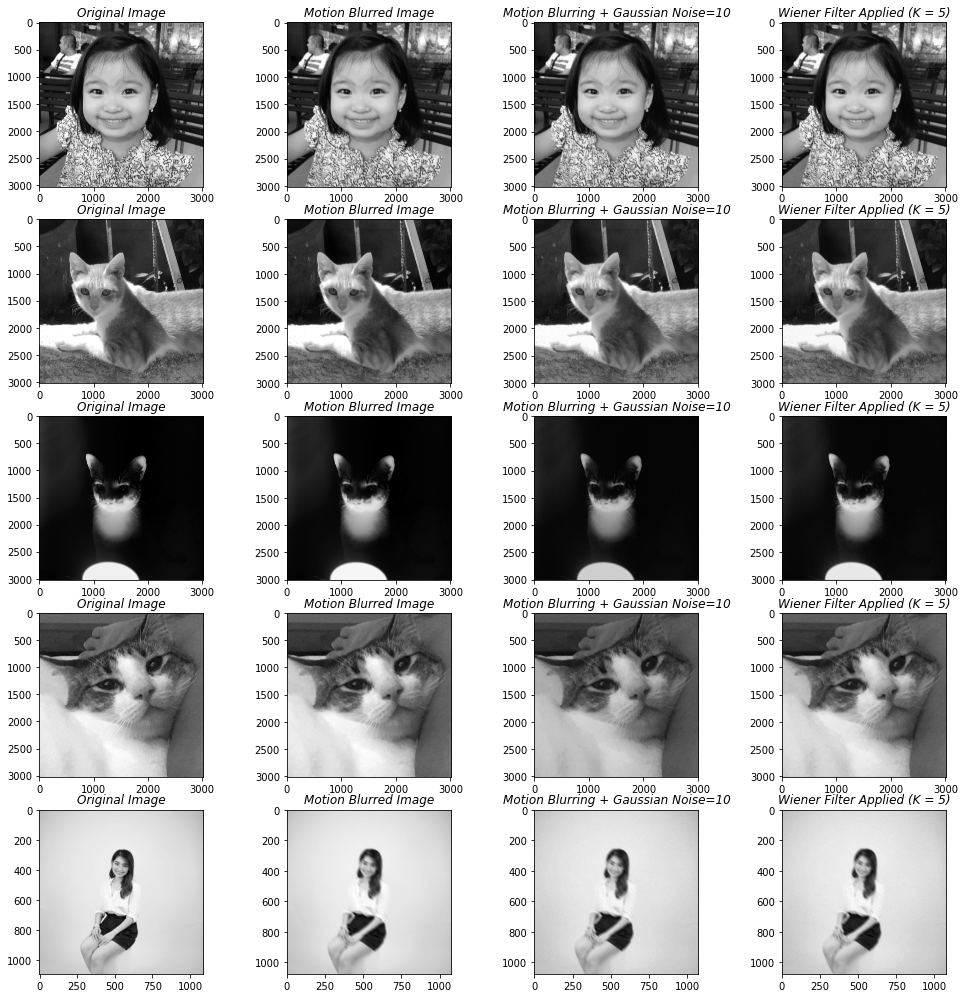

In [ ]:
# Blur Value = `15`  |   Gaussian Noise = `10`   |  Weiner Filter (`K = 5`)

# Blur the original images (Motion Blurred)
blurred_img1 = blur(img_daylight, kernel_size = 15)
blurred_img2 = blur(img_sunlight, kernel_size = 15)
blurred_img3 = blur(img_shadow, kernel_size = 15)
blurred_img4 = blur(img_lowlight, kernel_size = 15)
blurred_img5 = blur(img_candlelight, kernel_size = 15)

# Add Gaussian noise to the blurred images (Motion Blurring + Gaussian Noise)
noisy_img1 = add_gaussian_noise(blurred_img1, sigma = 10)
noisy_img2 = add_gaussian_noise(blurred_img2, sigma = 10)
noisy_img3 = add_gaussian_noise(blurred_img3, sigma = 10)
noisy_img4 = add_gaussian_noise(blurred_img4, sigma = 10)
noisy_img5 = add_gaussian_noise(blurred_img5, sigma = 10)

# Apply Wiener Filter K = 3
kernel = gaussian_kernel(3)

filtered_img1 = wiener_filter(noisy_img1, kernel, K = 5)
filtered_img2 = wiener_filter(noisy_img2, kernel, K = 5)
filtered_img3 = wiener_filter(noisy_img3, kernel, K = 5)
filtered_img4 = wiener_filter(noisy_img4, kernel, K = 5)
filtered_img5 = wiener_filter(noisy_img5, kernel, K = 5)

# for visualization
display = [img_daylight, blurred_img1, noisy_img1, filtered_img1, img_sunlight, blurred_img2, noisy_img2, filtered_img2, img_shadow, blurred_img3, noisy_img3, filtered_img3, img_lowlight, blurred_img4, noisy_img4, filtered_img4, img_candlelight, blurred_img5, noisy_img5, filtered_img5]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise=10', 'Wiener Filter Applied (K = 5)', 'Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise=10', 'Wiener Filter Applied (K = 5)', 'Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise=10', 'Wiener Filter Applied (K = 5)', 'Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise=10', 'Wiener Filter Applied (K = 5)', 'Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise=10', 'Wiener Filter Applied (K = 5)']

rows, columns = 5, 4
fig = plt.figure(figsize=(17, 17.5))

for i in range(0, rows*columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i], style='oblique')

plt.show()

### Evaluation Noise = `10`  |  `K= 5`

In [ ]:
# resizing k=5
shaped_img1 = cv2.resize(filtered_img1, img_daylight.shape)
shaped_img2 = cv2.resize(filtered_img2, img_sunlight.shape)
shaped_img3 = cv2.resize(filtered_img3, img_shadow.shape)
shaped_img4 = cv2.resize(filtered_img4, img_lowlight.shape)
shaped_img5 = cv2.resize(filtered_img5, img_candlelight.shape)

# RMSE
rmse_skimg1 = metrics.normalized_root_mse(img_daylight, shaped_img1)
rmse_skimg2 = metrics.normalized_root_mse(img_sunlight, shaped_img2)
rmse_skimg3 = metrics.normalized_root_mse(img_shadow, shaped_img3)
rmse_skimg4 = metrics.normalized_root_mse(img_lowlight, shaped_img4)
rmse_skimg5 = metrics.normalized_root_mse(img_candlelight, shaped_img5)

#mse
mse_skimg1 = metrics.mean_squared_error(img_daylight, shaped_img1)
mse_skimg2 = metrics.mean_squared_error(img_sunlight, shaped_img2)
mse_skimg3 = metrics.mean_squared_error(img_shadow, shaped_img3)
mse_skimg4 = metrics.mean_squared_error(img_lowlight, shaped_img4)
mse_skimg5 = metrics.mean_squared_error(img_candlelight, shaped_img5)

# PSNR
psnr_skimg1 = metrics.peak_signal_noise_ratio(img_daylight, shaped_img1, data_range=None)
psnr_skimg2 = metrics.peak_signal_noise_ratio(img_sunlight, shaped_img2, data_range=None)
psnr_skimg3 = metrics.peak_signal_noise_ratio(img_shadow, shaped_img3, data_range=None)
psnr_skimg4 = metrics.peak_signal_noise_ratio(img_lowlight, shaped_img4, data_range=None)
psnr_skimg5 = metrics.peak_signal_noise_ratio(img_candlelight, shaped_img5, data_range=None)

# SSIM
ssim_skimg1 = ssim(img_daylight, shaped_img1, data_range = img_daylight.max() - img_daylight.min(), multichannel = True)
ssim_skimg2 = ssim(img_sunlight, shaped_img2, data_range = img_sunlight.max() - img_sunlight.min(), multichannel = True)
ssim_skimg3 = ssim(img_shadow, shaped_img3, data_range = img_shadow.max() - img_shadow.min(), multichannel = True)
ssim_skimg4 = ssim(img_lowlight, shaped_img4, data_range = img_lowlight.max() - img_lowlight.min(), multichannel = True)
ssim_skimg5 = ssim(img_candlelight, shaped_img5, data_range = img_candlelight.max() - img_candlelight.min(), multichannel = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


In [ ]:
metrics_x5 = {'image': ['img_daylight', 'img_sunlight', 'img_shadow', 'img_lowlight', 'img_candlelight'],
          'RMSE':[rmse_skimg1, rmse_skimg2, rmse_skimg3, rmse_skimg4, rmse_skimg5],
          'MSE': [mse_skimg1, mse_skimg2, mse_skimg3, mse_skimg4, mse_skimg5],
          'PSNR': [psnr_skimg1,psnr_skimg2, psnr_skimg3,psnr_skimg4, psnr_skimg5],
          'SSIM': [ssim_skimg1, ssim_skimg2, ssim_skimg3, ssim_skimg4, ssim_skimg5]}

five = pd.DataFrame(metrics_x5)
print(five)

             image      RMSE           MSE       PSNR      SSIM
0     img_daylight  0.877879  13805.075300   6.730416  0.205428
1     img_sunlight  0.876416  10175.476069   8.055256  0.213703
2       img_shadow  0.876169   2024.267116  15.068125  0.427119
3     img_lowlight  0.875185  12462.441896   7.174772  0.235181
4  img_candlelight  0.875237  34041.969341   2.810657  0.235966


### Evaluation Noise = `10`  |  `K= 7`

In [ ]:
# Blur Value = `15`  |   Gaussian Noise = `10`   |  Weiner Filter (`K = 7`)

# Will use the previous variables for blurring and noise
# since blurring and noise values didn't change.

# Apply Wiener Filter K = 5
kernel = gaussian_kernel(3)

filtered_img1 = wiener_filter(noisy_img1, kernel, K = 7)
filtered_img2 = wiener_filter(noisy_img2, kernel, K = 7)
filtered_img3 = wiener_filter(noisy_img3, kernel, K = 7)
filtered_img4 = wiener_filter(noisy_img4, kernel, K = 7)
filtered_img5 = wiener_filter(noisy_img5, kernel, K = 7)

In [ ]:
# resizing k=7
shaped_img1 = cv2.resize(filtered_img1, img_daylight.shape)
shaped_img2 = cv2.resize(filtered_img2, img_sunlight.shape)
shaped_img3 = cv2.resize(filtered_img3, img_shadow.shape)
shaped_img4 = cv2.resize(filtered_img4, img_lowlight.shape)
shaped_img5 = cv2.resize(filtered_img5, img_candlelight.shape)

# RMSE
rmse1 = metrics.normalized_root_mse(img_daylight, shaped_img1)
rmse2 = metrics.normalized_root_mse(img_sunlight, shaped_img2)
rmse3 = metrics.normalized_root_mse(img_shadow, shaped_img3)
rmse4 = metrics.normalized_root_mse(img_lowlight, shaped_img4)
rmse5 = metrics.normalized_root_mse(img_candlelight, shaped_img5)

#mse
mse1 = metrics.mean_squared_error(img_daylight, shaped_img1)
mse2 = metrics.mean_squared_error(img_sunlight, shaped_img2)
mse3 = metrics.mean_squared_error(img_shadow, shaped_img3)
mse4 = metrics.mean_squared_error(img_lowlight, shaped_img4)
mse5 = metrics.mean_squared_error(img_candlelight, shaped_img5)

# PSNR
psnr1 = metrics.peak_signal_noise_ratio(img_daylight, shaped_img1, data_range=None)
psnr2 = metrics.peak_signal_noise_ratio(img_sunlight, shaped_img2, data_range=None)
psnr3 = metrics.peak_signal_noise_ratio(img_shadow, shaped_img3, data_range=None)
psnr4 = metrics.peak_signal_noise_ratio(img_lowlight, shaped_img4, data_range=None)
psnr5 = metrics.peak_signal_noise_ratio(img_candlelight, shaped_img5, data_range=None)

# SSIM
ssim1 = ssim(img_daylight, shaped_img1, data_range = img_daylight.max() - img_daylight.min(), multichannel = True)
ssim2 = ssim(img_sunlight, shaped_img2, data_range = img_sunlight.max() - img_sunlight.min(), multichannel = True)
ssim3 = ssim(img_shadow, shaped_img3, data_range = img_shadow.max() - img_shadow.min(), multichannel = True)
ssim4 = ssim(img_lowlight, shaped_img4, data_range = img_lowlight.max() - img_lowlight.min(), multichannel = True)
ssim5 = ssim(img_candlelight, shaped_img5, data_range = img_candlelight.max() - img_candlelight.min(), multichannel = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


In [ ]:
metrics_x7 = {'image': ['img_daylight', 'img_sunlight', 'img_shadow', 'img_lowlight', 'img_candlelight'],
          'RMSE':[rmse1, rmse2, rmse3, rmse4, rmse5],
          'MSE': [mse1, mse2, mse3, mse4, mse5],
          'PSNR': [psnr1,psnr2, psnr3,psnr4, psnr5],
          'SSIM': [ssim1, ssim2, ssim3, ssim4, ssim5]}

seven = pd.DataFrame(metrics_x7)
print(seven)

             image      RMSE           MSE       PSNR      SSIM
0     img_daylight  0.877879  13805.075300   6.730416  0.205428
1     img_sunlight  0.876416  10175.476069   8.055256  0.213703
2       img_shadow  0.876169   2024.267116  15.068125  0.427119
3     img_lowlight  0.875185  12462.441896   7.174772  0.235181
4  img_candlelight  0.875237  34041.969341   2.810657  0.235966
